In [439]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
sb.set()

from sklearn import preprocessing


In [440]:
CardioData = pd.read_csv('C://Users//user//Desktop//EE0005//cardio_train.csv',sep=';')

In [441]:
CardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [442]:
CardioData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [443]:
print("Data Shape,",CardioData.shape)
print("Data Shape,",type(CardioData))

Data Shape, (70000, 13)
Data Shape, <class 'pandas.core.frame.DataFrame'>


In [444]:
CardioData['age']=(CardioData['age']/365)

CardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [445]:
CardioData.dtypes

id               int64
age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [446]:
CardioData['age'] = CardioData['age'].astype('int')

# Data Cleaning
Data Cleaning for some variables by changing their data types . 


Age(days)             Age (Years)


Gender                1 - Female (F) , 2 - Male (M)


Cholesterol           1: normal, 2: above normal, 3: well above normal


Gluc                  1: normal, 2: above normal, 3: well above normal


Smoke                 1: (Yes) Smoke , 0: (No) Never Smoke


# CardioData 
Checking variable types 

In [447]:
CardioData.dtypes

id               int64
age              int32
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [448]:
CardioData['gender'] = CardioData['gender'].astype('str')

In [449]:
CardioData['gender'] = CardioData['gender'].replace('1','F').replace('2','M')

In [450]:
CardioData['cholesterol'] = CardioData['cholesterol'].astype('str')

In [451]:
CardioData['cholesterol'] = CardioData['cholesterol'].replace('1','normal').replace('2','above normal').replace('3','well above normal')

In [452]:
CardioData['smoke'] = CardioData['smoke'].astype('str')

In [453]:
CardioData['smoke'] = CardioData['smoke'].replace('0','No').replace('1','Yes')

In [454]:
CardioData['alco'] = CardioData['alco'].astype('str')

In [455]:
CardioData['alco'] = CardioData['alco'].replace('0','No').replace('1','Yes')

In [456]:
CardioData['gluc'] = CardioData['gluc'].astype('str')

In [457]:
CardioData['gluc'] = CardioData['gluc'].replace('1','normal').replace('2','above normal').replace('3','well above normal')

In [458]:
CardioData

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,M,168,62.0,110,80,normal,normal,No,No,1,0
1,1,55,F,156,85.0,140,90,well above normal,normal,No,No,1,1
2,2,51,F,165,64.0,130,70,well above normal,normal,No,No,0,1
3,3,48,M,169,82.0,150,100,normal,normal,No,No,1,1
4,4,47,F,156,56.0,100,60,normal,normal,No,No,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,M,168,76.0,120,80,normal,normal,Yes,No,1,0
69996,99995,61,F,158,126.0,140,90,above normal,above normal,No,No,1,1
69997,99996,52,M,183,105.0,180,90,well above normal,normal,No,Yes,0,1
69998,99998,61,F,163,72.0,135,80,normal,above normal,No,No,0,1


In [459]:
CardioData.describe()

,id,age,height,weight,ap_hi,ap_lo,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,164.359229,74.205690,128.817286,96.630414,0.803729,0.499700
std,28851.302323,6.766774,8.210126,14.395757,154.011419,188.472530,0.397179,0.500003
min,0.000000,29.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000
25%,25006.750000,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,53.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,58.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000
max,99999.000000,64.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000


# Target Variable Counts
35,021 out of 70,000 cases in this dataset are labelled as having no cardiovascular disease, and 34,979 cases are labelled as having cardiovascular disease. This suggests that the dataset is roughly balanced.

In [460]:
# check distribution of target variable
CardioData.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [461]:
CardioData['gender'] = CardioData['gender'].astype('category')
CardioData['cholesterol'] = CardioData['cholesterol'].astype('category')
CardioData['smoke'] = CardioData['smoke'].astype('category')
CardioData['gluc'] = CardioData['gluc'].astype('category')
CardioData['alco'] = CardioData['alco'].astype('category')

# Data Visualisaton 
Visulising catergorical data such as gender and binary data such cholesterol , smoke , gluc , alco , active with seaborn catplot.

F    45530
M    24470
Name: gender, dtype: int64

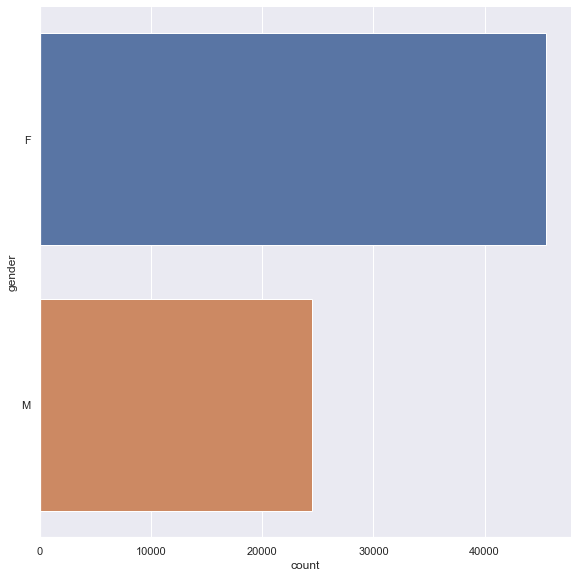

In [462]:
sb.catplot(y = 'gender', data = CardioData, kind = "count", height = 8)
CardioData.gender.value_counts()


normal               52385
above normal          9549
well above normal     8066
Name: cholesterol, dtype: int64

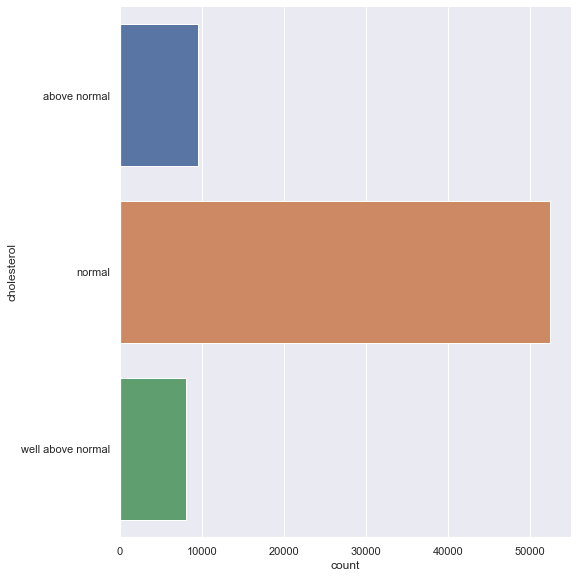

In [463]:
sb.catplot(y = 'cholesterol', data = CardioData, kind = "count", height = 8)
CardioData.cholesterol.value_counts()

No     63831
Yes     6169
Name: smoke, dtype: int64

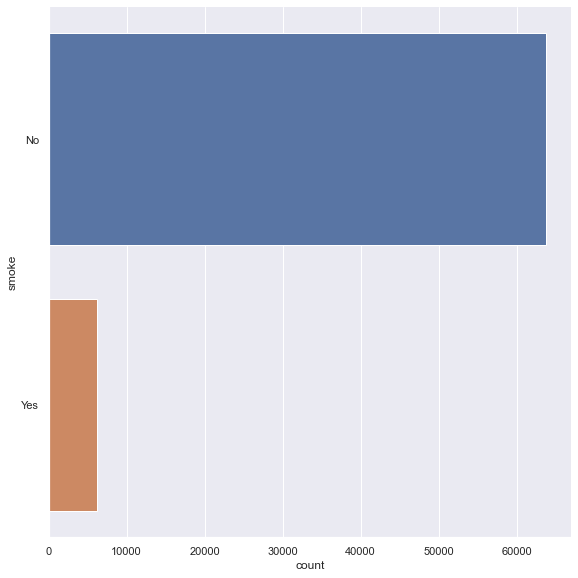

In [464]:
sb.catplot(y = 'smoke', data = CardioData, kind = "count", height = 8)
CardioData.smoke.value_counts()

normal               59479
well above normal     5331
above normal          5190
Name: gluc, dtype: int64

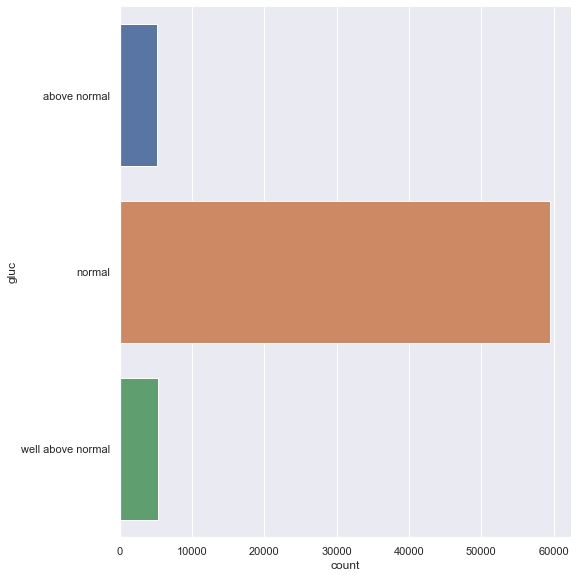

In [465]:
sb.catplot(y = 'gluc', data = CardioData, kind = "count", height = 8)
CardioData.gluc.value_counts()

No     66236
Yes     3764
Name: alco, dtype: int64

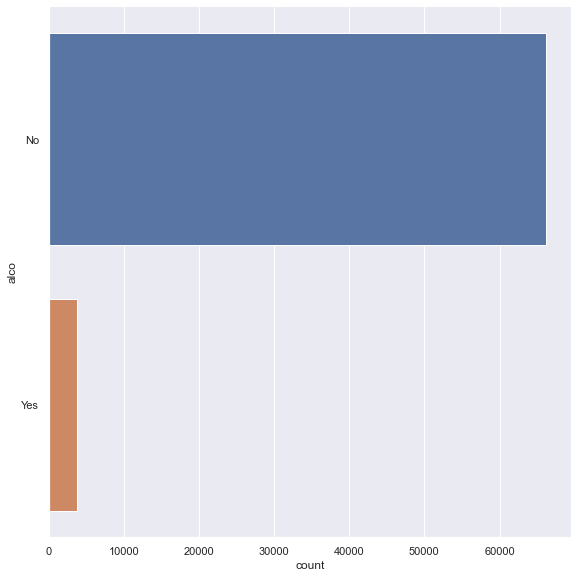

In [466]:
sb.catplot(y = 'alco', data = CardioData, kind = "count", height = 8)
CardioData.alco.value_counts()

1    56261
0    13739
Name: active, dtype: int64

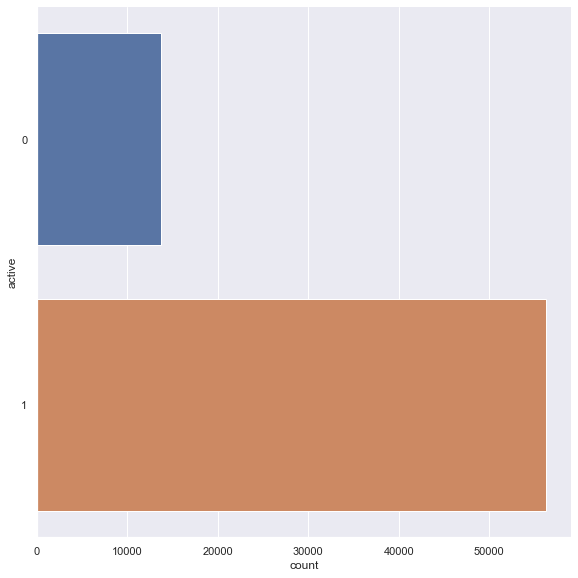

In [467]:
sb.catplot(y = 'active', data = CardioData, kind = "count", height = 8)
CardioData.active.value_counts()

In [468]:
Cardio_data = pd.DataFrame(CardioData[["age", "height", "weight", "ap_hi", "ap_lo"]])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:

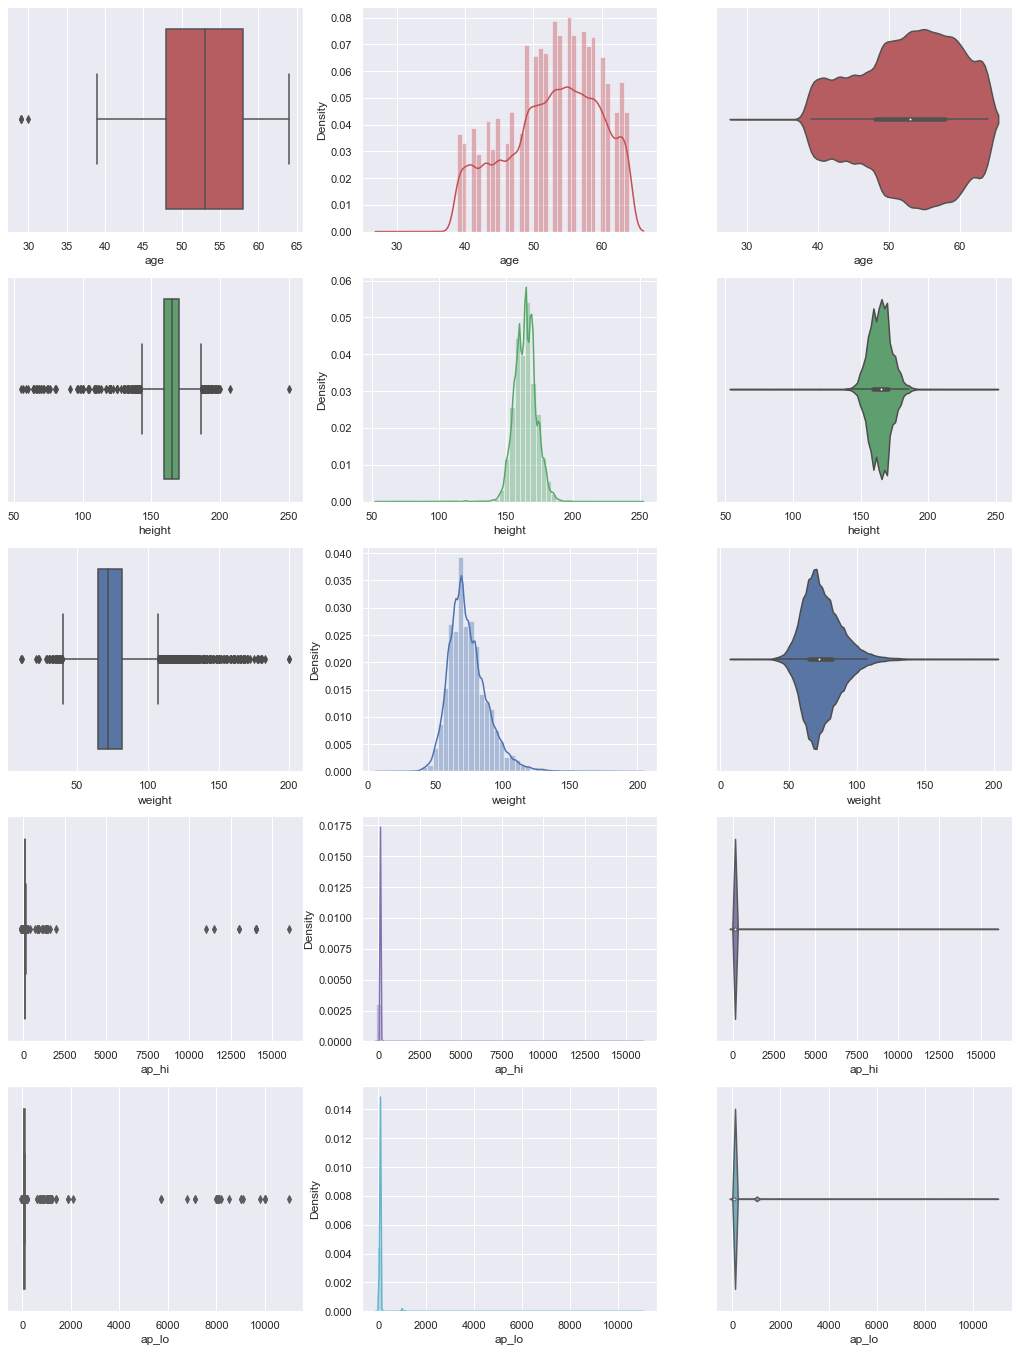

In [469]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in Cardio_data:
    sb.boxplot(Cardio_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(Cardio_data[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(Cardio_data[var], color = colors[count], ax = axes[count,2])
    count += 1

#  Predicting Cardio as Target Variable using remaining features
Use all the other 11 features from the dataset to predict Cardio as target variable .

In [470]:
CardioData1 = pd.read_csv('C://Users//user//Desktop//EE0005//cardio_train.csv',sep=';')
CardioData1

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [471]:
X = pd.DataFrame(CardioData1[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]).values
Y = pd.DataFrame(CardioData1[["cardio"]])

# Predicting Cardio Target Variable using Confusion Matrix

In [472]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the Dataset into Train and Test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

# Check the sample sizes
print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (42000, 1) (42000, 11)
Test Set  : (28000, 1) (28000, 11)


In [473]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, Y_train)                    # train the decision tree model

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
print()



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7150714285714286



Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7150714285714286

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7121428571428572



(2.5, -0.5)

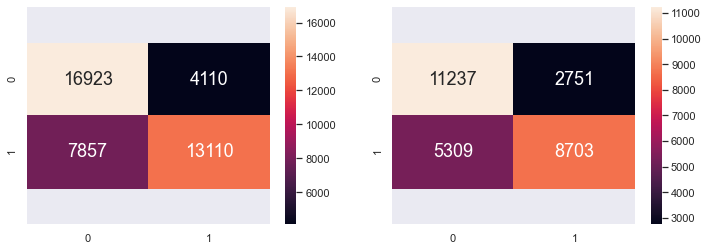

In [474]:
Y_train_pred = dectree.predict(X_train)
Y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
heatmap1 = sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

bottom, top = heatmap1.get_ylim()               #Use to set the limit for the heatmap to prevent it from going out 
heatmap1.set_ylim(bottom + 0.5, top - 0.5)

heatmap2 = sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

bottom, top = heatmap2.get_ylim()               #Use to set the limit for the heatmap to prevent it from going out 
heatmap2.set_ylim(bottom + 0.5, top - 0.5)





# 
Confusion matrix is the most preferred model evaluation metric for any classification algorithm. The Confusion matrix will show the true positives, true negatives, false positives and false negatives. It is also extremely useful for measuring Recall, Precision and F1-Score.


True Positive (TP): You predicted positive and it’s true.

True Negative (TN): You predicted negative and it’s true.


False Positive (Type 1 Error): You predicted positive and it’s false.


False Negative (Type 2 Error): You predicted negative and it’s false.

<AxesSubplot:>

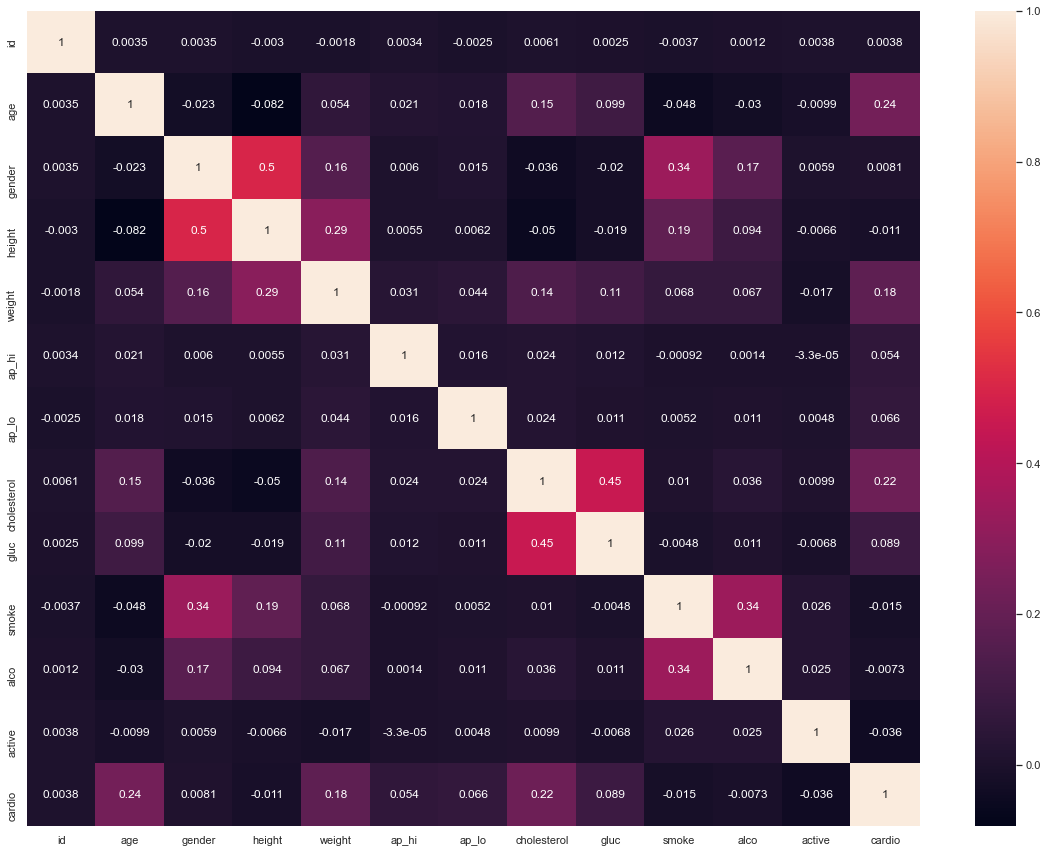

In [475]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(CardioData1.corr(), annot=True)


A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (cardio) and that generally, there do not exist significant correlations between other variables. However, correlations exist between a select few variables:

Height and gender are correlated with a score of 0.5.

Glucose and cholesterol are correlated with a score of 0.45.


Smoking habits and alcohol are correlated with a score of 0.34.

<ipython-input-476-6471ae96d500>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-476-6471ae96d500>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,num

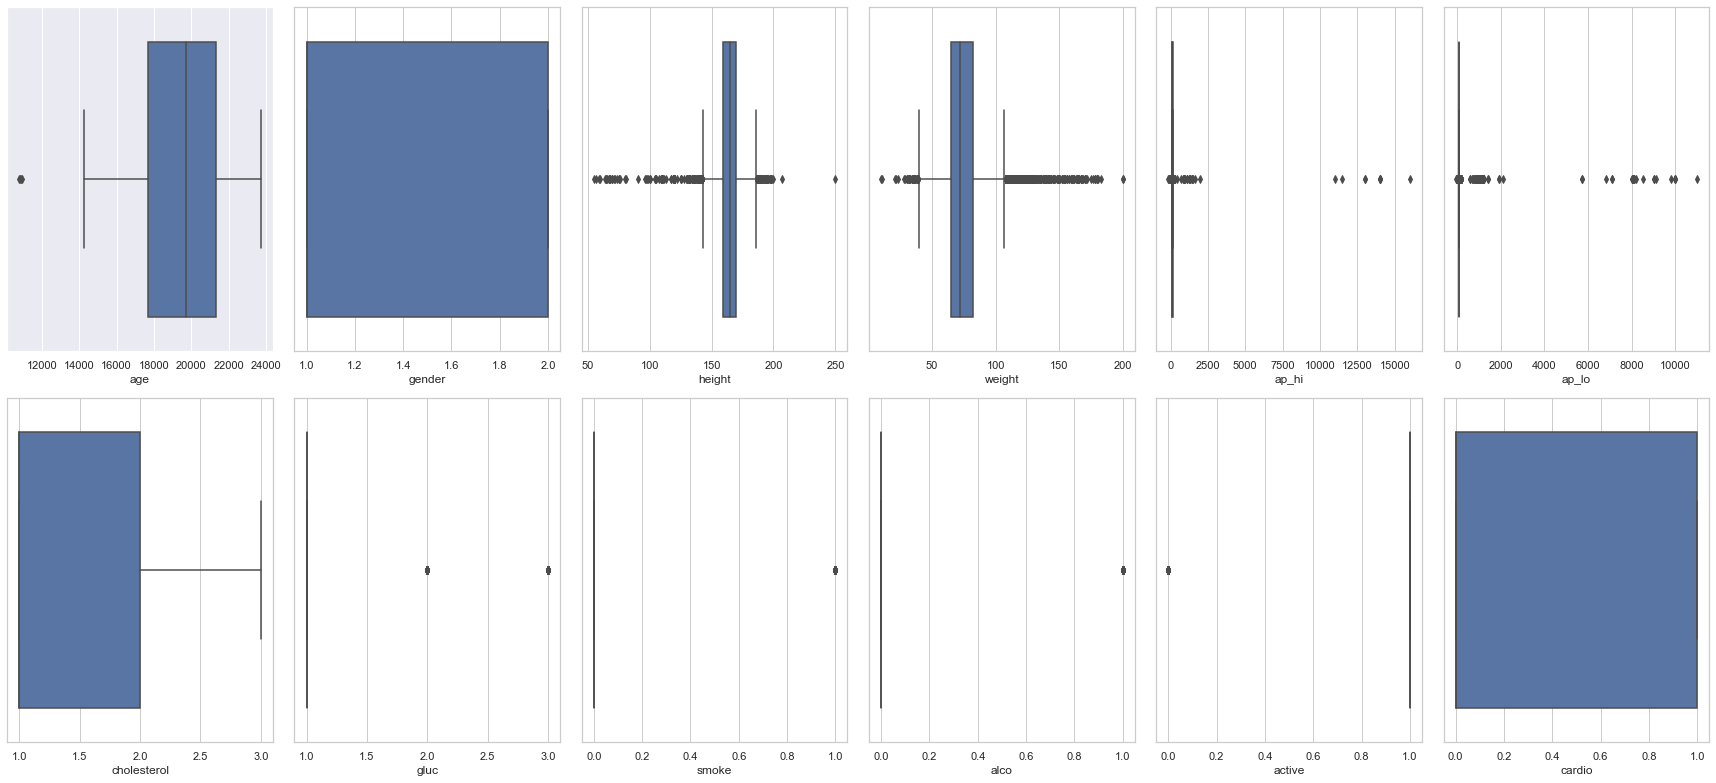

In [476]:
# check outliers

def check_outliers(CardioData1):
    l = CardioData1.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(CardioData1[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(CardioData1)

# 
The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables (ap_hi and ap_lo). These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

<ipython-input-477-e40156db713f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-477-e40156db713f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a

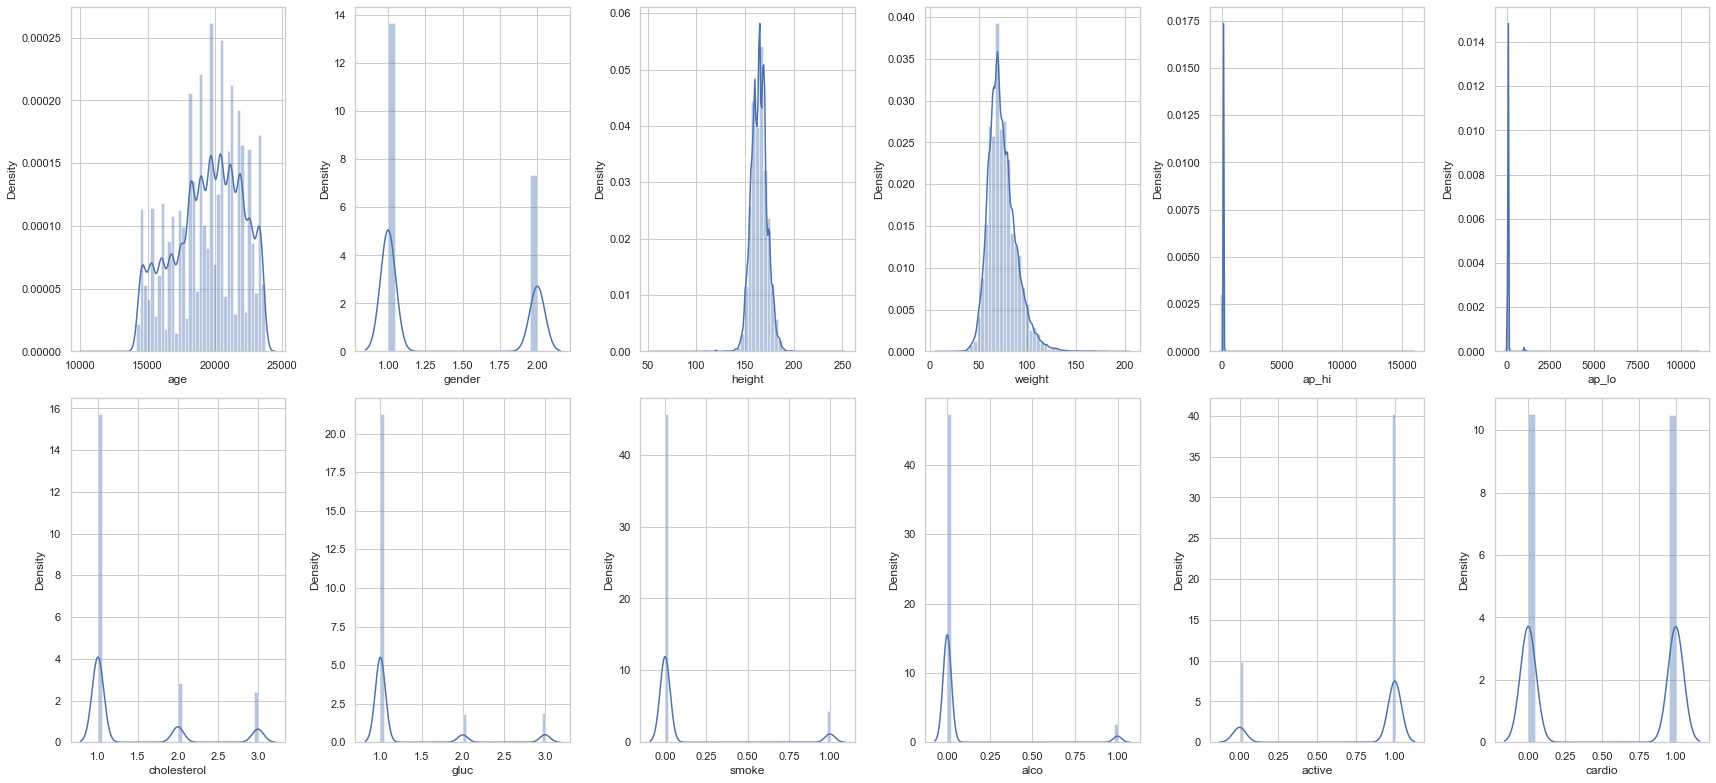

In [477]:
# check distribution and skew
def check_dist(CardioData1):
    l = CardioData1.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,number_of_columns,i)
        sns.distplot(CardioData1[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(CardioData1)

# 
Histograms show the distribution of each feature in the dataset. There appears to be some variation in age, but height and weight are roughly normally distributed. However, the histograms further suggest the presence of outliers in the blood pressure features. Moreover, there exist categorical features in the dataset, such as gender, cholesterol, glucose, smoking habits, alcohol use, and activity.

In [478]:
# remove outliers in ap_hi and ap_lo
cleaned_CardioData1 = CardioData1[CardioData1['ap_hi'] < 250]  
cleaned_CardioData1 = cleaned_CardioData1[cleaned_CardioData1['ap_lo'] < 250] 

print(cleaned_CardioData1.shape)

(69007, 13)


<ipython-input-476-6471ae96d500>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-476-6471ae96d500>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,num

<ipython-input-476-6471ae96d500>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


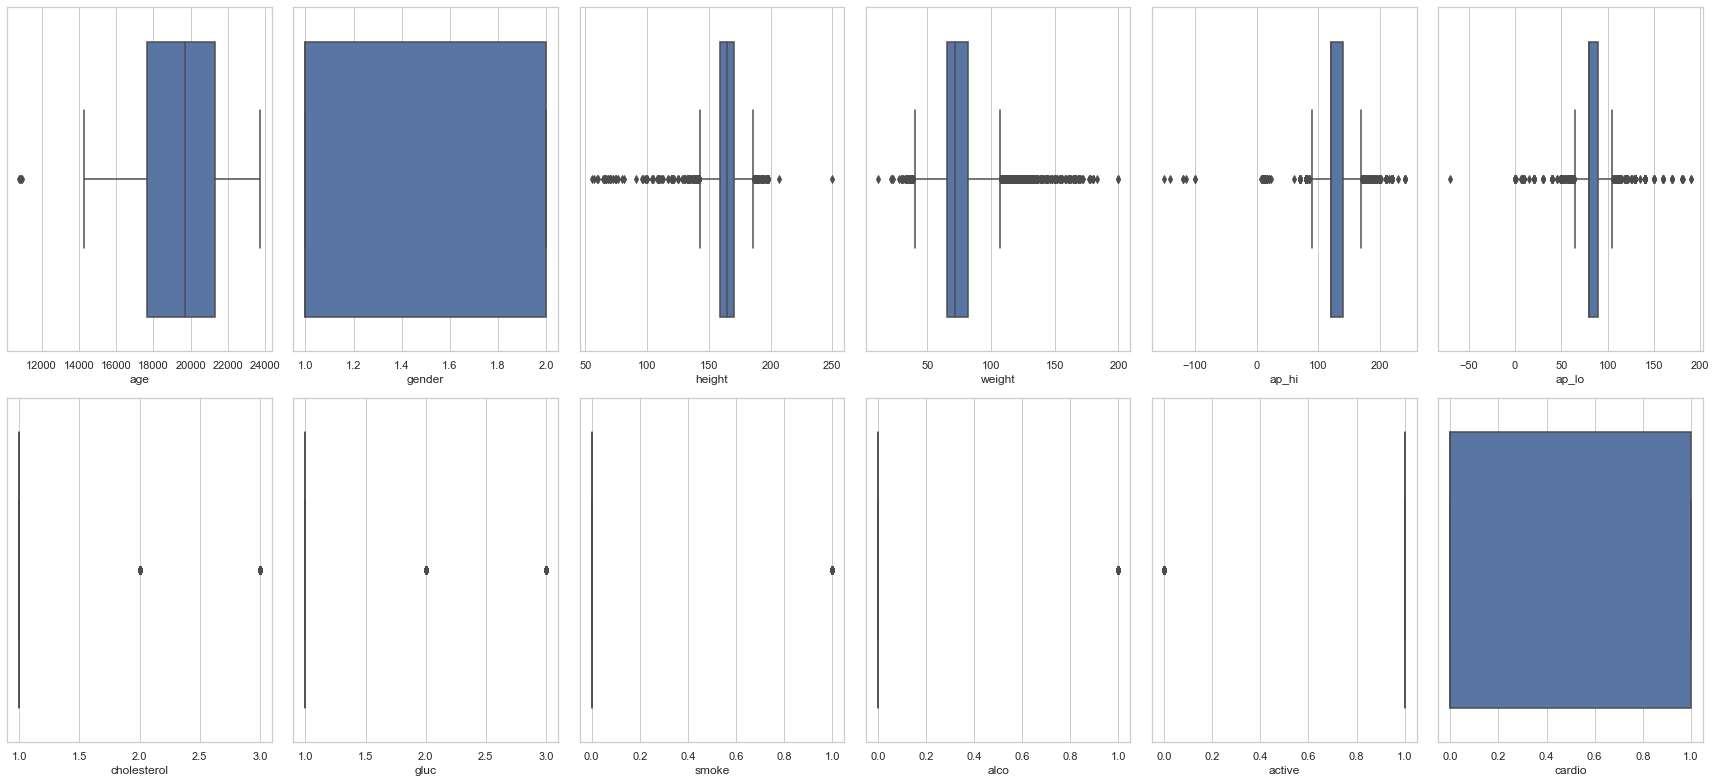

In [479]:
check_outliers(cleaned_CardioData1)

<ipython-input-477-e40156db713f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-477-e40156db713f>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a

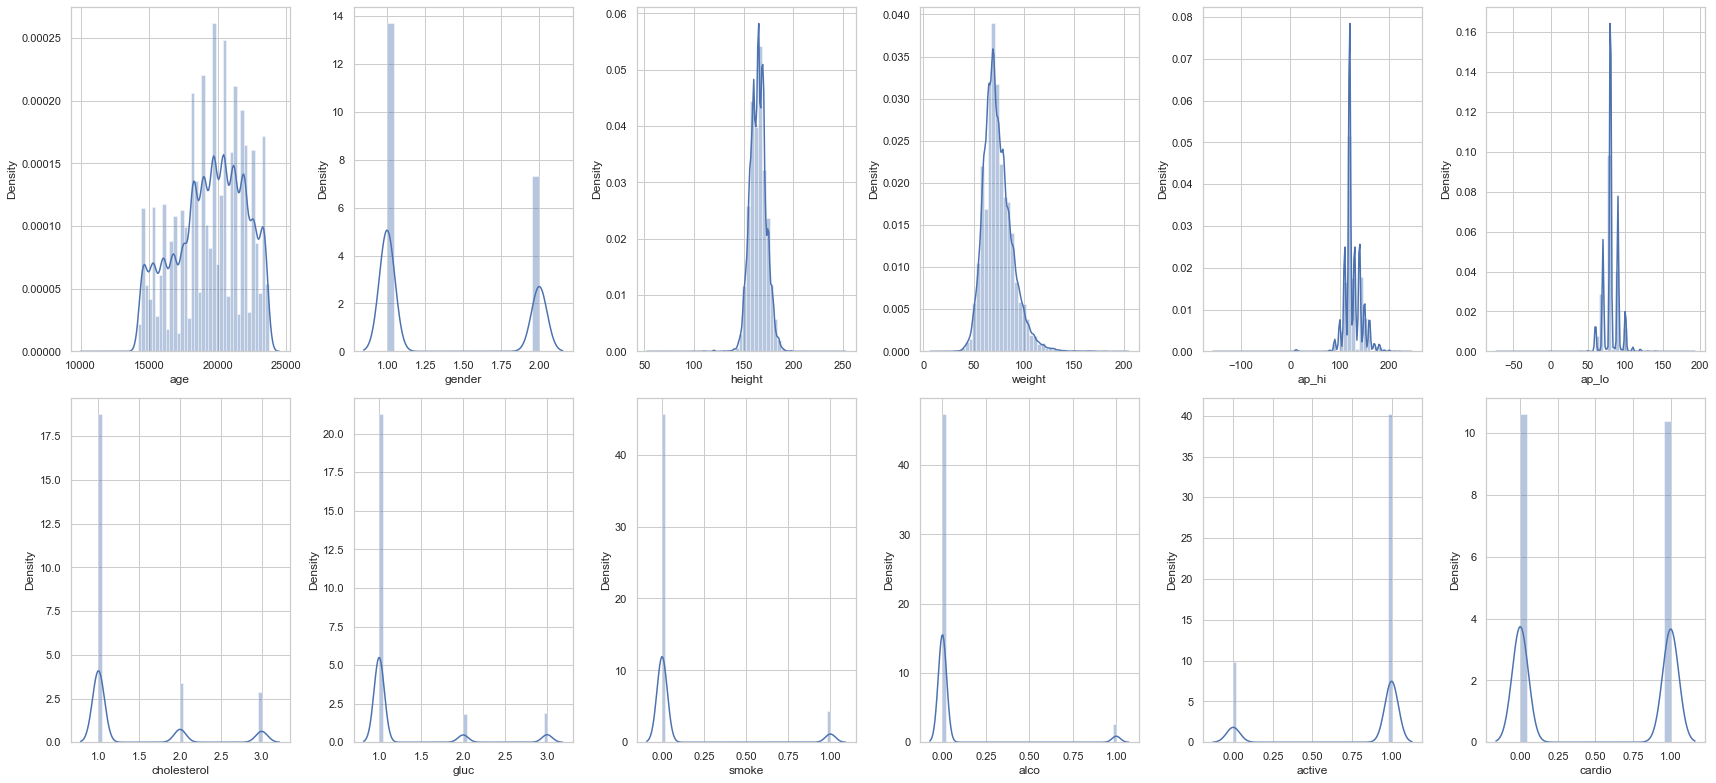

In [480]:
check_dist(cleaned_CardioData1)

In [481]:
cont_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
ord_cols = ['cholesterol', 'gluc']
bin_cols = ['gender', 'smoke', 'alco', 'active', 'cardio']

# create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# create an object to transform the data to fit minmax processor
CardioData1_scaled = min_max_scaler.fit_transform(cleaned_CardioData1[cont_cols])

# run the normalizer on the dataframe
CardioData1_normalized = pd.DataFrame(CardioData1_scaled)
CardioData1_normalized.columns = cont_cols
CardioData1_normalized.head()

,age,height,weight,ap_hi,ap_lo
0,0.588076,0.579487,0.269841,0.666667,0.576923
1,0.730159,0.517949,0.391534,0.743590,0.615385
2,0.624003,0.564103,0.280423,0.717949,0.538462
3,0.528455,0.584615,0.375661,0.769231,0.653846
4,0.516918,0.517949,0.238095,0.641026,0.500000


In [482]:
for col in ord_cols:
    dummies = pd.get_dummies(cleaned_CardioData1[col])
    min_ind = min([ind for ind in dummies.columns])
    dummies.columns = ['{0}_{1}'.format(col, ind) for ind in dummies.columns]
    CardioData1_normalized = pd.concat([CardioData1_normalized, dummies.drop(['{0}_{1}'.format(col, min_ind)], axis=1)], axis=1)

    
CardioData1_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,0.588076,0.579487,0.269841,0.666667,0.576923,0.0,0.0,0.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,1.0,0.0,0.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,1.0,0.0,0.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,0.0,0.0,0.0,0.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,0.0,0.0,0.0,0.0


In [483]:
CardioData1_normalized = pd.concat([CardioData1_normalized, cleaned_CardioData1[bin_cols]], axis=1)
CardioData1_normalized['gender'] -= 1  # shift the categorical labels for gender to be either 0 or 1

CardioData1_normalized.head()

,age,height,weight,ap_hi,ap_lo,cholesterol_2,cholesterol_3,gluc_2,gluc_3,gender,smoke,alco,active,cardio
0,0.588076,0.579487,0.269841,0.666667,0.576923,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.730159,0.517949,0.391534,0.743590,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.564103,0.280423,0.717949,0.538462,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,0.584615,0.375661,0.769231,0.653846,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.516918,0.517949,0.238095,0.641026,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using prediction models                                                                                        Support Vector Machine(SVM) & Random Forest (RF)
We now try to fit Support Vector Machine (SVM) and Random Forest (RF) classifiers on the cleaned dataset

In [484]:
# try an SVM Classifier
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

CardioData1_normalized= CardioData1_normalized.dropna()
print(CardioData1_normalized.shape)
x = CardioData1_normalized.drop('cardio', axis=1)
y = CardioData1_normalized['cardio']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42) # 80% training and 20% test

(68030, 14)


In [485]:
# create a svm classifier
clf = svm.SVC() # rbf kernel
# train the model using the training sets
clf.fit(x_train, y_train)

SVC()

In [486]:
# evaluate the model
def evaluate_model(clf, x_test, y_test):

    # predict the response for test dataset
    y_pred = clf.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

    # precision: what percentage of positive tuples are labeled as such?
    print("Precision:",metrics.precision_score(y_test, y_pred))

    # recall: what percentage of positive tuples are labelled as such?
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    # calc auc
#     probas = clf.predict_proba(X_test)
#     auc = roc_auc_score(testy, probs)
#     print('AUC: %.3f' % auc)

In [487]:
evaluate_model(clf, x_test, y_test)

Accuracy: 0.6034837571659561
Precision: 0.6517959277053306
Recall: 0.423832192799762


In [488]:
# try Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [489]:
evaluate_model(rf_clf,x_test, y_test)

# get feature importances
feature_imp = pd.Series(rf_clf.feature_importances_,index=x_test.columns).sort_values(ascending=False)
feature_imp

Accuracy: 0.5589445832720858
Precision: 0.5573223087931308
Recall: 0.521422195775067


age              0.362740
weight           0.220945
height           0.191126
ap_hi            0.087364
ap_lo            0.057316
cholesterol_3    0.037755
cholesterol_2    0.009876
gender           0.007305
gluc_3           0.005939
alco             0.005671
gluc_2           0.004885
active           0.004838
smoke            0.004239
dtype: float64

# 
Ranking the 11 features importance in Descending Order 


The SVM classifier achieved an accuracy of 0.60 yet had a low recall rate of 0.42. The RF classifier yielded an accuracy of 0.56 and a recall rate of 0.52. There is room for improvement over these baseline predictive models. Future direction may include tuning hyperparameters for the SVM and RF classifiers, or using other types of models, such as linear and logistic regression, Bayesian classifiers, and feed-forward neural networks.